In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Merging and fixing the data

csv_files = glob.glob("*.csv")
data_dict = {file: pd.read_csv(file) for file in csv_files}

df_combined = pd.concat(data_dict.values(), ignore_index=True)

df_combined.to_csv("all_data.csv", index=False)

all_data = pd.read_csv("all_data.csv")

nan_count = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')


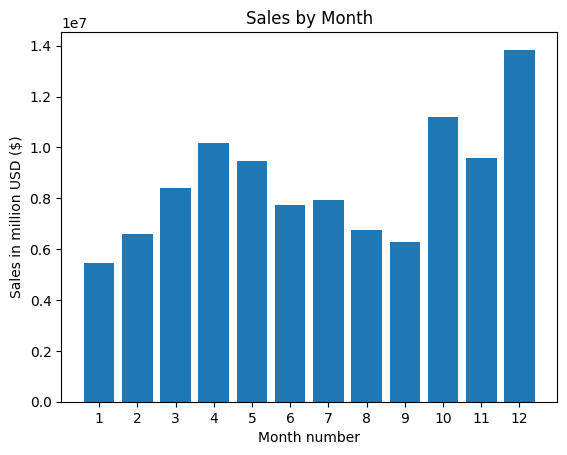

In [88]:
#Q1 Which month records the highest amount of sales

all_data['Order Date'] = all_data['Order Date'].astype(str)

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

results = all_data.groupby(['Month']).sum()
Months=range(1,13)


plt.bar(Months,results['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in million USD ($)')
plt.xlabel('Month number')
plt.title('Sales by Month')
plt.show()

# We can clearly see that december records the highest amount of sales

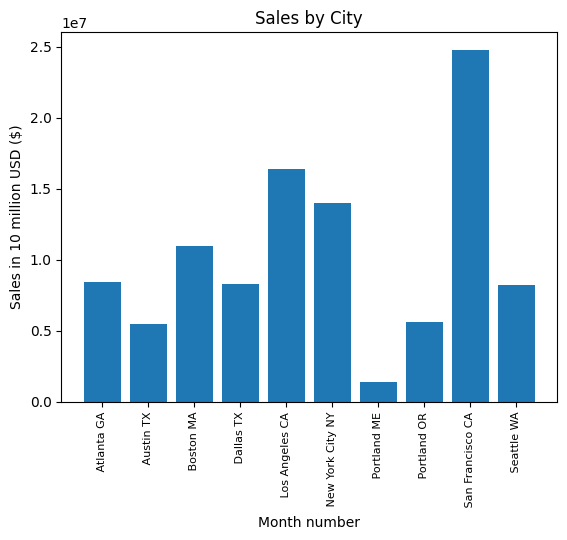

In [89]:
#Q2. Which city has the highest sales?

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city']=all_data['Purchase Address'].apply(lambda x:get_city(x) + ' '+ get_state(x))

results=all_data.groupby('city')['Sales'].sum()

cities=results.index
sales=results.values

plt.bar(cities,sales)
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in 10 million USD ($)')
plt.xlabel('Month number')
plt.title('Sales by City')
plt.show()

#San Francisco CA has the most amount of sales

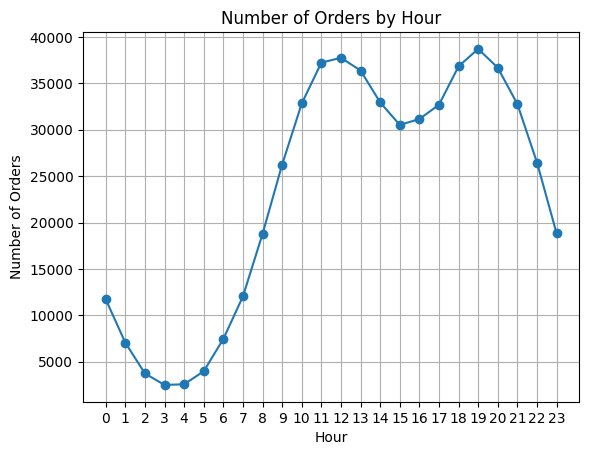

In [91]:
# Q3 What time should we disply advertisments to maximize likelihood of customer's buying product?

all_data = all_data[all_data['Order Date'].notna()]
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce', format="%m/%d/%Y")
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


order_counts = all_data.groupby('Hour')['Order ID'].count()

plt.plot(order_counts.index, order_counts.values, marker='o')
plt.xticks(order_counts.index)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.grid()
plt.show()

#My recommendation is that we advertise around 11am and 7pm


In [ ]:
#Q4 What products are most often sold together?

duplicat_id=all_data[all_data['Order ID'].duplicated(keep=False)]

duplicat_id['Grouped']=duplicat_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicat_id=duplicat_id[['Order ID','Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count=Counter()

for row in duplicat_id['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

#So the most saled prudct together are USB-C Charging Cable 'USB-C Charging Cable'


('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


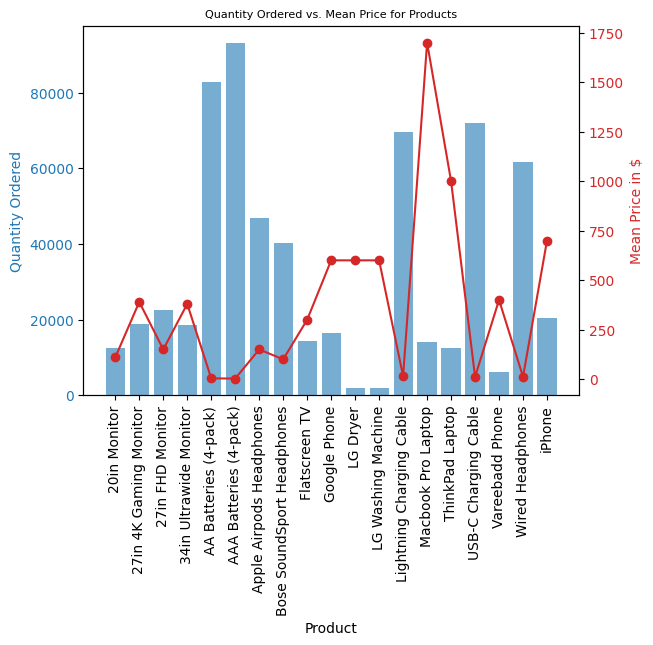

In [92]:
#Q5 Which product is sold the most?

import matplotlib.pyplot as plt
import numpy as np

product_group=all_data.groupby('Product')

quantity_ordered = product_group['Quantity Ordered'].sum()

products=[product for product,df in product_group]

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

prices = all_data.groupby('Product')['Price Each'].mean()

fig , ax1 = plt.subplots()
ax1.bar(products, quantity_ordered, color='tab:blue', alpha=0.6, label='Quantity Ordered')
ax2 = ax1.twinx()
ax2.plot(products, prices, color='tab:red', marker='o', linestyle='-', label='Mean Price')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='tab:blue')
ax2.set_ylabel('Mean Price in $', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical')

plt.title('Quantity Ordered vs. Mean Price for Products', size=8)
plt.show()

#Show by our graph we can see tat mostly AAA Batteries(4-Pack) is sold most and its because its mean price among one of lowest and it is used a lot in electroic prodcuts
